In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

DATA_PATH = '/root/Workspace/DataLake/bidmc_csv'
DATA_PATH2 = '/root/Workspace/Project-RRpo-2ndStudy/dataset/230921'

In [2]:
dataset_fast = np.load(f'{DATA_PATH2}/bidmc-preprocessed_fastRR.npy', allow_pickle=True)
dataset_normal = np.load(f'{DATA_PATH2}/bidmc-preprocessed_normalRR.npy', allow_pickle=True)
dataset_slow = np.load(f'{DATA_PATH2}/bidmc-preprocessed_slowRR.npy', allow_pickle=True)
print(dataset_fast.shape, dataset_normal.shape, dataset_slow.shape)

(26, 2) (22, 2) (2, 2)


In [3]:
# fast_ix = np.random.randint(0, 26); normal_ix = np.random.randint(0, 22); slow_ix = np.random.randint(0, 2);
# fast_ix = -1; normal_ix = -1; slow_ix = 1;
fast_ix = 16; normal_ix = 0; slow_ix = 1;

sel_fast_id = dataset_fast[fast_ix][0]; sel_fast_rr = round(np.mean([dataset_fast[fast_ix][1][i,1] for i in range(len(dataset_fast[fast_ix][1]))]))
sel_normal_id = dataset_normal[normal_ix][0]; sel_normal_rr = round(np.mean([dataset_normal[normal_ix][1][i,1] for i in range(len(dataset_normal[normal_ix][1]))]))
sel_slow_id = dataset_slow[slow_ix][0]; sel_slow_rr = round(np.mean([dataset_slow[slow_ix][1][i,1] for i in range(len(dataset_slow[slow_ix][1]))]))

In [4]:
fast_pleth = pd.read_csv(f'{DATA_PATH}/{sel_fast_id}_Signals.csv', usecols=['Time [s]', ' PLETH'])[' PLETH'].values
normal_pleth = pd.read_csv(f'{DATA_PATH}/{sel_normal_id}_Signals.csv', usecols=['Time [s]', ' PLETH'])[' PLETH'].values
slow_pleth = pd.read_csv(f'{DATA_PATH}/{sel_slow_id}_Signals.csv', usecols=['Time [s]', ' PLETH'])[' PLETH'].values
print(fast_pleth.shape, normal_pleth.shape, slow_pleth.shape)

(60001,) (60001,) (60001,)


In [5]:
fast_rr = pd.read_csv(f'{DATA_PATH}/{sel_fast_id}_Numerics.csv', usecols=['Time [s]', ' RESP']).values
normal_rr = pd.read_csv(f'{DATA_PATH}/{sel_normal_id}_Numerics.csv', usecols=['Time [s]', ' RESP']).values
slow_rr = pd.read_csv(f'{DATA_PATH}/{sel_slow_id}_Numerics.csv', usecols=['Time [s]', ' RESP']).values
print(fast_rr.shape, normal_rr.shape, slow_rr.shape)

(481, 2) (481, 2) (481, 2)


In [16]:
fast_rr

array([[  0,  25],
       [  1,  25],
       [  2,  25],
       [  3,  25],
       [  4,  25],
       [  5,  25],
       [  6,  25],
       [  7,  25],
       [  8,  25],
       [  9,  25],
       [ 10,  25],
       [ 11,  25],
       [ 12,  25],
       [ 13,  25],
       [ 14,  25],
       [ 15,  25],
       [ 16,  25],
       [ 17,  25],
       [ 18,  25],
       [ 19,  26],
       [ 20,  26],
       [ 21,  26],
       [ 22,  26],
       [ 23,  26],
       [ 24,  26],
       [ 25,  26],
       [ 26,  26],
       [ 27,  25],
       [ 28,  25],
       [ 29,  25],
       [ 30,  25],
       [ 31,  26],
       [ 32,  26],
       [ 33,  26],
       [ 34,  26],
       [ 35,  26],
       [ 36,  26],
       [ 37,  26],
       [ 38,  25],
       [ 39,  25],
       [ 40,  26],
       [ 41,  26],
       [ 42,  26],
       [ 43,  25],
       [ 44,  25],
       [ 45,  25],
       [ 46,  25],
       [ 47,  25],
       [ 48,  25],
       [ 49,  25],
       [ 50,  25],
       [ 51,  25],
       [ 52,

In [6]:
# pleth_fast = pd.read_csv(f'{DATA_PATH}/{sel_fast_id}/pleth.csv', header=None, names=['sid', 'offset', 'pleth']).pleth.values
# pleth_normal = pd.read_csv(f'{DATA_PATH}/{sel_normal_id}/pleth.csv', header=None, names=['sid', 'offset', 'pleth']).pleth.values
# pleth_slow = pd.read_csv(f'{DATA_PATH}/{sel_slow_id}/pleth.csv', header=None, names=['sid', 'offset', 'pleth']).pleth.values
# print(pleth_fast.shape, pleth_normal.shape, pleth_slow.shape)

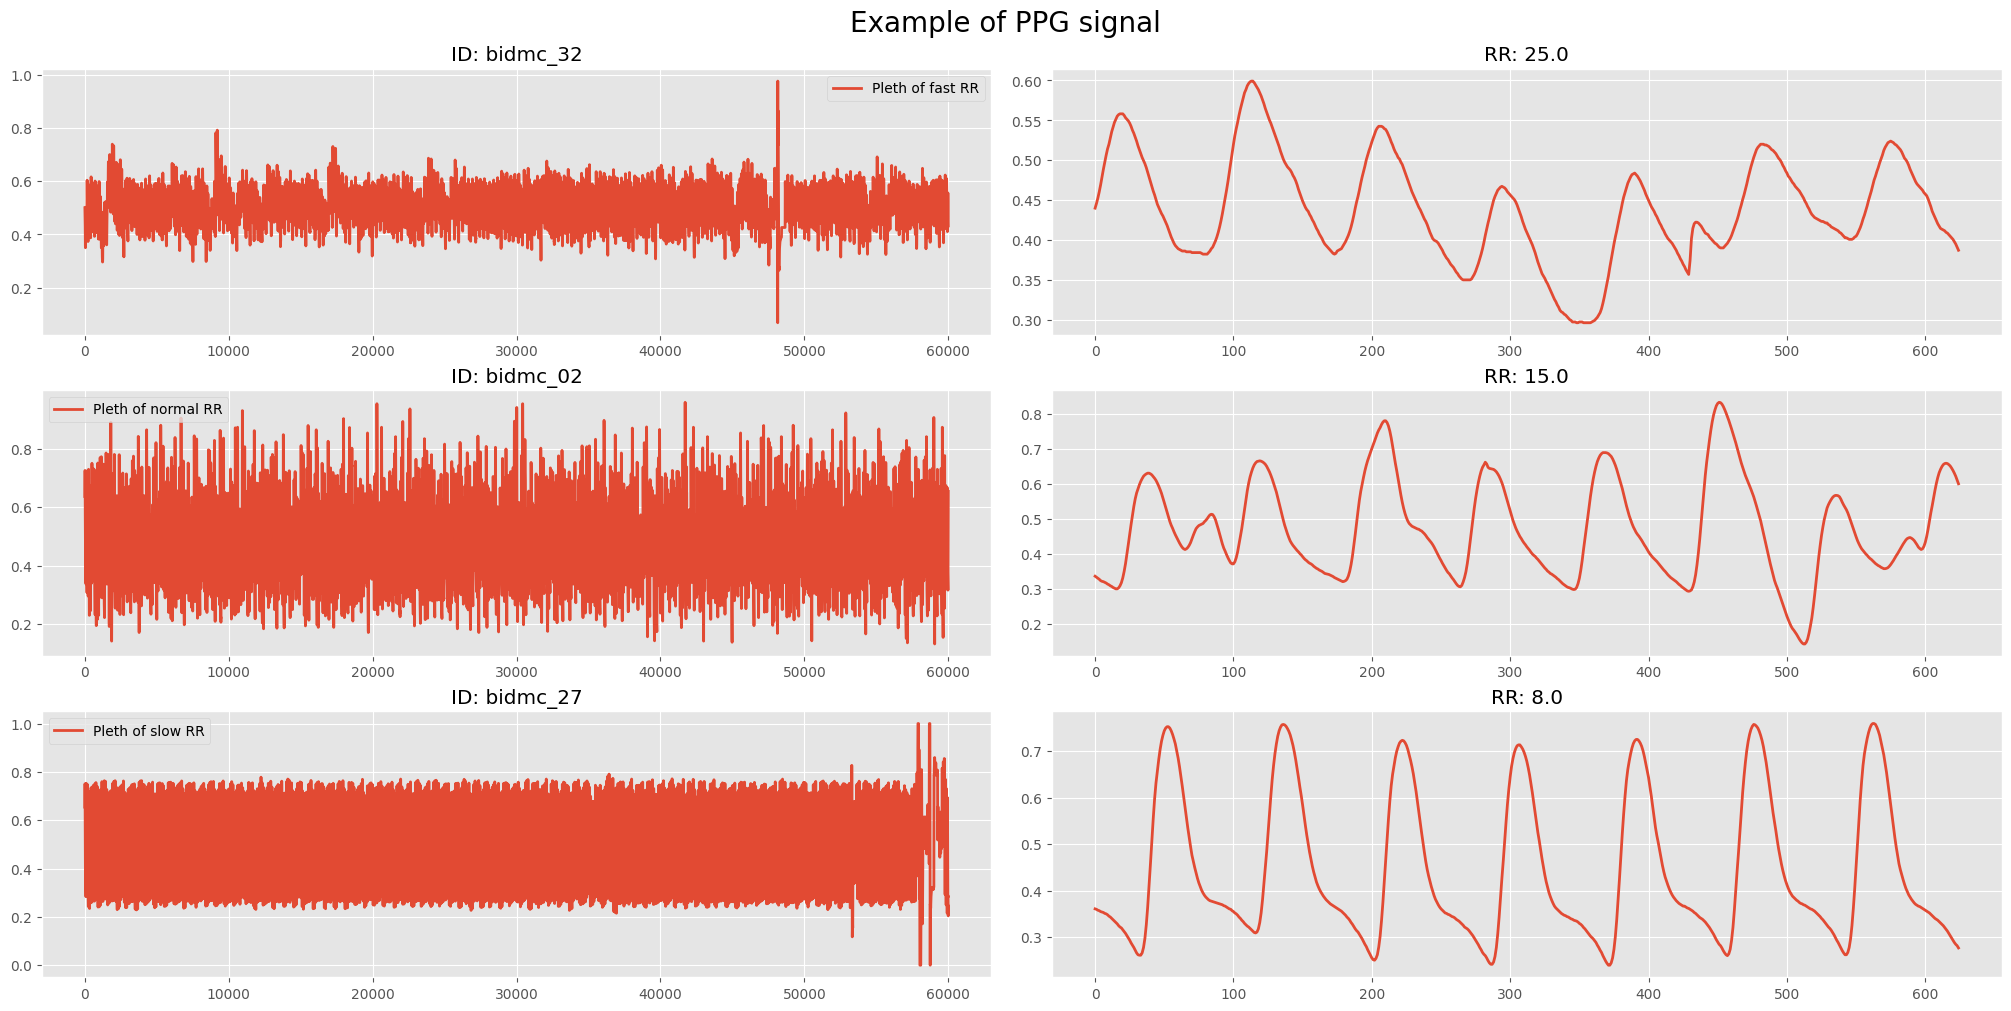

In [14]:
# i = np.random.randint(0, 470)
# print(f'Sample: {i}')
fi, ni, si = 7, 400, 309
fig, axs = plt.subplots(3,2,figsize=(20,10), constrained_layout=True)
axs[0,0].plot(fast_pleth, linewidth=2, label='Pleth of fast RR')
axs[0,1].plot(fast_pleth[125*fi:125*(fi+5)], linewidth=2, label='Pleth of fast RR')
axs[0,0].set_title(f'ID: {sel_fast_id}')
axs[0,1].set_title(f'RR: {np.round(np.median(fast_rr[fi:(fi+5),1]))}')
axs[1,0].plot(normal_pleth, linewidth=2, label='Pleth of normal RR')
axs[1,1].plot(normal_pleth[125*ni:125*(ni+5)], linewidth=2, label='Pleth of normal RR')
axs[1,0].set_title(f'ID: {sel_normal_id}')
axs[1,1].set_title(f'RR: {np.round(np.median(normal_rr[ni:(ni+5),1]))}')
axs[2,0].plot(slow_pleth, linewidth=2, label='Pleth of slow RR')
axs[2,1].plot(slow_pleth[125*si:125*(si+5)], linewidth=2, label='Pleth of slow RR')
axs[2,0].set_title(f'ID: {sel_slow_id}')
axs[2,1].set_title(f'RR: {np.round(np.median(slow_rr[si:(si+5),1]))}')
# axs[2,0].set_xlabel('offset')
for i in range(3): axs[i,0].legend()
plt.suptitle('Example of PPG signal', fontsize=20)
plt.show()

In [30]:
def SMA(sig, width):
    return np.convolve(sig, np.ones(width), 'valid')/width

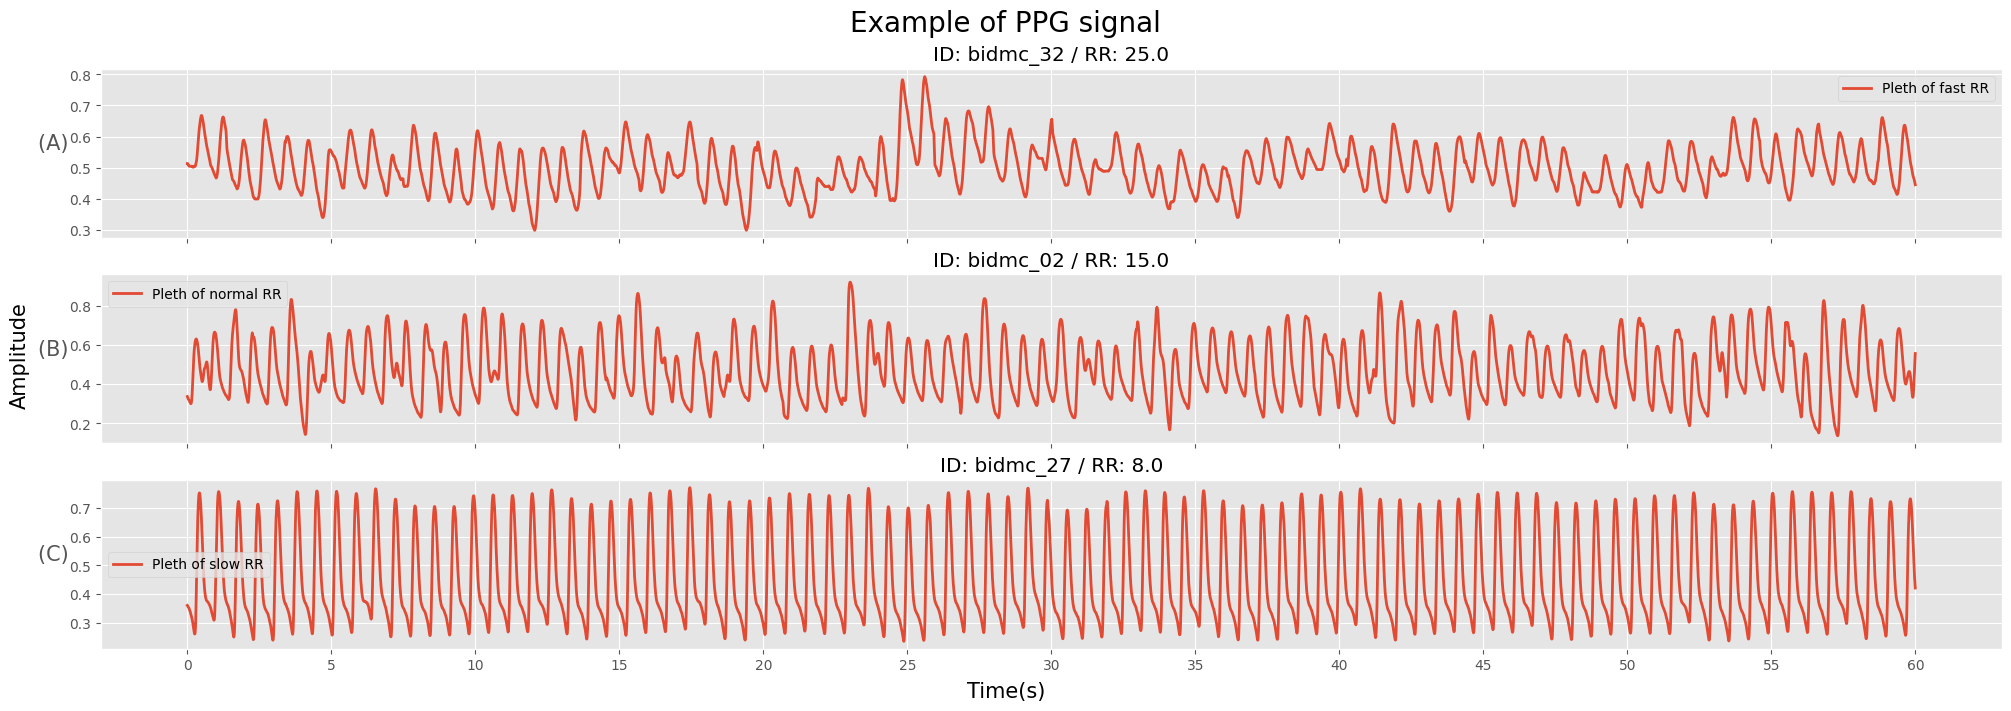

In [116]:
# i = np.random.randint(0, 470)
# print(f'Sample: {i}')
fi, ni, si = 48, 400, 309
fig, axs = plt.subplots(3,1,figsize=(20,7), sharex=True, constrained_layout=True)
# axs[0,0].plot(fast_pleth, linewidth=2, label='Pleth of fast RR')
fast_p = fast_pleth[125*fi:125*(fi+60)]
axs[0].plot(fast_p, linewidth=2, label='Pleth of fast RR')
# axs[0].plot(np.arange(125*2, 125*60+1), SMA(fast_p, 250), c='b', linewidth=1.5, linestyle='--', alpha=.7, label='MA of fast RR')
axs[0].set_title(f'ID: {sel_fast_id} / RR: {np.round(np.median(fast_rr[fi:(fi+60),1]))}')
# axs[1,0].plot(normal_pleth, linewidth=2, label='Pleth of normal RR')
normal_p = normal_pleth[125*ni:125*(ni+60)]
axs[1].plot(normal_p, linewidth=2, label='Pleth of normal RR')
# axs[1].plot(np.arange(125*2, 125*60+1), SMA(normal_p, 250), c='b', linewidth=1.5, linestyle='--', alpha=.7, label='MA of normal RR')
axs[1].set_title(f'ID: {sel_normal_id} / RR: {np.round(np.median(normal_rr[ni:(ni+60),1]))}')
# axs[2,0].plot(slow_pleth, linewidth=2, label='Pleth of slow RR')
slow_p = slow_pleth[125*si:125*(si+60)]
axs[2].plot(slow_p, linewidth=2, label='Pleth of slow RR')
# axs[2].plot(np.arange(125*2, 125*60+1), SMA(slow_p, 250), c='b', linewidth=1.5, linestyle='--', alpha=.7, label='MA of slow RR')
axs[2].set_title(f'ID: {sel_slow_id} / RR: {np.round(np.median(slow_rr[si:(si+60),1]))}')
# axs[2,0].set_xlabel('offset')
for i in range(3): axs[i].legend()
for i in range(3): axs[i].set_xticks(np.arange(0,7501,125*5), np.arange(0,61,5))
axs[0].set_ylabel('(A)   ', fontsize=15, rotation=0)
axs[1].set_ylabel('(B)   ', fontsize=15, rotation=0)
axs[2].set_ylabel('(C)   ', fontsize=15, rotation=0)
plt.suptitle('Example of PPG signal', fontsize=20)
# axs[2].set_xlabel('time(s)', fontsize=15)
fig.supxlabel('Time(s)', fontsize=15)
fig.supylabel('Amplitude', fontsize=15)
plt.show()